<a href="https://colab.research.google.com/github/Unclepablo1024/ML_project/blob/main/Spam_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Email Detection

Email spam, or junk mail, remains a persistent issue, flooding inboxes with unsolicited and often malicious content. These emails may contain cryptic messages, scams, or, most dangerously, phishing attempts.
Your task is to create an effective email spam detection classifier using Python and machine learning to predict whether an email is Spam or Ham. There are two training datasets with their corresponding training label. And one test data to predict the label
TrainData 1 contains 2228 samples, 1927 samples are Ham emails, and 301 samples are Spam emails.
TrainData 2 contains 2068 samples, 1440 samples are Ham emails, and 628 samples are Spam emails.
TestData, contains 6447 samples


##Project Objectives:

- Data Preprocessing: Our project begins with the preprocessing of a substantial email dataset, encompassing tasks such as data cleaning, handling missing values, and converting text data into a format suitable for machine learning.

- Machine Learning Model Selection: We aim to design and evaluate a robust spam detection model. Our choice of machine learning algorithms, including decision trees, support vector machines, and neural networks, seeks to maximize the model's effectiveness.

- Model Evaluation: To assess the model's performance, we employ metrics like accuracy, precision, recall, F1-score, and ROC-AUC to ensure a comprehensive understanding of its effectiveness.


- Hyperparameter Tuning: The project involves fine-tuning model hyperparameters to optimize predictive accuracy and minimize false positives, which can have a significant impact in the context of email spam detection.

- Cross-Validation and Generalization: Rigorous cross-validation techniques and testing on dedicated datasets are applied to confirm the model's ability to generalize to new, previously unseen email data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_train1 = pd.read_csv('/content/spam_train1.csv', engine='python')
data_train2 = pd.read_csv("/content/spam_train2.csv")



In [2]:
data_train1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,No. But we'll do medical missions to nigeria,NaN,NaN,NaN
1,ham,"Did I forget to tell you ? I want you , I need...",NaN,NaN,NaN
2,ham,Hi msg me:)i'm in office..,NaN,NaN,NaN
3,ham,Are u coming to the funeral home,NaN,NaN,NaN
4,ham,Should I head straight there or what,NaN,NaN,NaN


In [3]:
# Keep only the useful columns
data_train1 = data_train1[['v1', 'v2']].copy()
data_train1.columns = ['label', 'text']

# adding a label_num column to mimic the train 2 structure

data_train1['label_num'] = data_train1['label'].str.lower().map({'ham': 0, 'spam': 1})

# Verify the result
data_train1.head()



,label,text,label_num
0,ham,No. But we'll do medical missions to nigeria,0
1,ham,"Did I forget to tell you ? I want you , I need...",0
2,ham,Hi msg me:)i'm in office..,0
3,ham,Are u coming to the funeral home,0
4,ham,Should I head straight there or what,0


In [4]:
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      2228 non-null   object
 1   text       2228 non-null   object
 2   label_num  2228 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [5]:
data_train2.head()

,Unnamed: 0,label,text,label_num
0,3069,ham,Subject: fw : subject : survivor 2\r\nthe cont...,0
1,4809,spam,Subject: goldeditor : resource opportunities p...,1
2,551,ham,Subject: panenergy marketing company\r\nbecaus...,0
3,5,ham,"Subject: mcmullen gas for 11 / 99\r\njackie ,\...",0
4,676,ham,Subject: memo and presentation from brian redm...,0


In [6]:
data_train2['label'].value_counts()

,count
label,
ham,1440
spam,628


In [7]:
data_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2068 non-null   int64 
 1   label       2068 non-null   object
 2   text        2068 non-null   object
 3   label_num   2068 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 64.8+ KB


In [8]:
# Drop any null or empty text just in case
df1 = data_train1.dropna(subset=['text'])
df2 = data_train2.dropna()

# Drop duplicates (optional, but good practice)
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

df1["text"] = df1["text"].apply(lambda x : x.replace('\r\n', ' '))
df2["text"] = df2["text"].apply(lambda x : x.replace('\r\n', ' '))

df1["text"] = df1["text"].apply(lambda x : x.replace('\\', ''))
df2["text"] = df2["text"].apply(lambda x : x.replace('\\', ''))



# Reset the index after dropping rows
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)


In [9]:
# Test if data sets have still nulls, duplicates or unexpected characters
print("Missing values (Train 1):", df1.isnull().sum().sum())
print("Missing values (Train 2):", df2.isnull().sum().sum())

print("Duplicates (Train 1):", df1.duplicated().sum())
print("Duplicates (Train 2):", df2.duplicated().sum())

#pull random extracts from Text to see if it refects how we want it to
df2.text.iloc[2]
# df1.v2.iloc[2]


Missing values (Train 1): 0
Missing values (Train 2): 0
Duplicates (Train 1): 0
Duplicates (Train 2): 0


"Subject: panenergy marketing company because of a timing issue with client services , i have fixed deal 157288 , separating the carthage meter to a new ticket . that ticket is 229758 . the price for the carthage is suppose to be if hsc - . 06 . stacy : i will need feb pathed asap so volume mgmt can get the volumes moved . client services needs to get this invoice out today . this problem , among others with this exchange deal , is currently we have a massive a / r issue and we ' re trying to get this cleanup before end of month . if you have any questions , please feel free to call me ."

In [10]:
#we loose about 100 + rows after modification
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      2165 non-null   object
 1   text       2165 non-null   object
 2   label_num  2165 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 50.9+ KB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2068 non-null   int64 
 1   label       2068 non-null   object
 2   text        2068 non-null   object
 3   label_num   2068 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 64.8+ KB


## Logistic Regression

We will attempt to use several models but we will start with logistic Regression first:

In [12]:


train2 = df2.copy()  # replace with your actual DataFrame name

# --- Combine both datasets ---
combined = pd.concat([df1[['text', 'label_num']], train2[['text', 'label_num']]], ignore_index=True)

print("Combined shape:", combined.shape)
print("Class distribution:\n", combined['label_num'].value_counts())
combined.head()


Combined shape: (4233, 2)
Class distribution:
 label_num
0    3318
1     915
Name: count, dtype: int64


,text,label_num
0,No. But we'll do medical missions to nigeria,0
1,"Did I forget to tell you ? I want you , I need...",0
2,Hi msg me:)i'm in office..,0
3,Are u coming to the funeral home,0
4,Should I head straight there or what,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = combined['text']
y = combined['label_num']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Validation samples:", len(X_val))



Training samples: 3386
Validation samples: 847


In [14]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000,     # keeps top 5000 informative words
    ngram_range=(1, 2)     # include single words and pairs
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


Lets test with different hyperparameters on what the best one will be

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Cs = [0.1, 0.3, 0.5, 1.0, 2.0, 5.0]

lr_results = []

for c in Cs:
    lr = LogisticRegression(
        C=c,
        max_iter=1000,
        solver='liblinear',
        class_weight='balanced',
        random_state=42
    )
    lr.fit(X_train_tfidf, y_train)
    y_pred_lr = lr.predict(X_val_tfidf)

    acc  = accuracy_score(y_val, y_pred_lr)
    prec = precision_score(y_val, y_pred_lr, pos_label=1)  # spam = 1
    rec  = recall_score(y_val, y_pred_lr, pos_label=1)
    f1   = f1_score(y_val, y_pred_lr, pos_label=1)

    lr_results.append((c, acc, prec, rec, f1))

print(" C   | accuracy | prec(spam) | rec(spam) | f1(spam)")
for c, acc, prec, rec, f1 in lr_results:
    print(f"{c:3} | {acc:.4f}  |  {prec:.4f}    |  {rec:.4f}   |  {f1:.4f}")


 C   | accuracy | prec(spam) | rec(spam) | f1(spam)
0.1 | 0.9551  |  0.8680    |  0.9344   |  0.9000
0.3 | 0.9563  |  0.8842    |  0.9180   |  0.9008
0.5 | 0.9575  |  0.8889    |  0.9180   |  0.9032
1.0 | 0.9587  |  0.8895    |  0.9235   |  0.9062
2.0 | 0.9610  |  0.8989    |  0.9235   |  0.9111
5.0 | 0.9599  |  0.8942    |  0.9235   |  0.9086


In [16]:
log_reg = LogisticRegression(
    C=2.0,               # best regularization strength found
    max_iter=1000,
    solver='liblinear',
    class_weight='balanced',   # handles class imbalance
    random_state=42
)

log_reg.fit(X_train_tfidf, y_train)


LogisticRegression(C=2.0, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [17]:
y_pred = log_reg.predict(X_val_tfidf)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n",
      classification_report(y_val, y_pred, target_names=['Ham', 'Spam']))


Accuracy: 0.961038961038961

Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      0.97      0.98       664
        Spam       0.90      0.92      0.91       183

    accuracy                           0.96       847
   macro avg       0.94      0.95      0.94       847
weighted avg       0.96      0.96      0.96       847



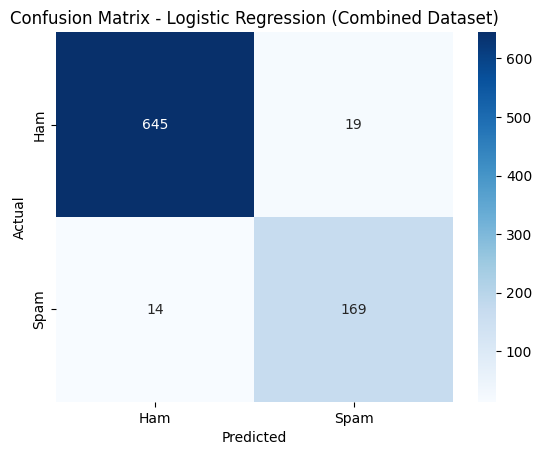

In [18]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Combined Dataset)")
plt.show()

## Test Dataset
Now that we have trained our model we can test it, lets proceed to use the testing data:



In [19]:
# Load test dataset
test_data = pd.read_csv('/content/spam_test.csv', encoding='utf-8', engine='python', on_bad_lines='skip')

print("Test shape:", test_data.shape)
test_data.head()


Test shape: (6447, 1)


,message
0,"SMS SERVICES. for your inclusive text credits,..."
1,ILL B DOWN SOON
2,"Subject: vastar / big thicket\r\nanita ,\r\npe..."
3,Subject: point change for deals\r\nfyi - - - i...
4,"Subject: hpl nom for may 25 , 2001\r\n( see at..."


In [20]:
test_data = test_data.rename(columns={'message': 'text'})
test_data = test_data.dropna(subset=['text']).reset_index(drop=True)

test_data["text"] = test_data["text"].apply(lambda x : x.replace('\r\n', ' '))
test_data["text"] = test_data["text"].apply(lambda x : x.replace('\\', ''))

test_data.head()


,text
0,"SMS SERVICES. for your inclusive text credits,..."
1,ILL B DOWN SOON
2,"Subject: vastar / big thicket anita , per our ..."
3,Subject: point change for deals fyi - - - i ch...
4,"Subject: hpl nom for may 25 , 2001 ( see attac..."


In [21]:
X_test_tfidf = vectorizer.transform(test_data['text'])
test_predictions = log_reg.predict(X_test_tfidf)
test_probabilities = log_reg.predict_proba(X_test_tfidf)[:, 1]  # probability for spam=1
test_data['predicted_label'] = test_predictions
test_data['predicted_label_text'] = test_data['predicted_label'].map({0: 'ham', 1: 'spam'})
test_data.head()


,text,predicted_label,predicted_label_text
0,"SMS SERVICES. for your inclusive text credits,...",1,spam
1,ILL B DOWN SOON,0,ham
2,"Subject: vastar / big thicket anita , per our ...",0,ham
3,Subject: point change for deals fyi - - - i ch...,0,ham
4,"Subject: hpl nom for may 25 , 2001 ( see attac...",0,ham


## Multinomial Naive Bayes
Now that we have tested some results with Logistic Regression lets try to find different results with other models. We have already cleaned the data so no there is no need to repeat that process.

We will first need to see what alpha is the best for Naive Bayes in terms of results, we will run a loop and get different results based on different alpha inputs:

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

alphas = [0.1, 0.3, 0.5, 1.0, 2.0]

results = []
for a in alphas:
    nb = MultinomialNB(alpha=a)
    nb.fit(X_train_tfidf, y_train)
    y_pred_nb = nb.predict(X_val_tfidf)

    acc  = accuracy_score(y_val, y_pred_nb)
    prec = precision_score(y_val, y_pred_nb, pos_label=1)
    rec  = recall_score(y_val, y_pred_nb, pos_label=1)
    f1   = f1_score(y_val, y_pred_nb, pos_label=1)

    results.append((a, acc, prec, rec, f1))

print("alpha | accuracy | prec(spam) | rec(spam) | f1(spam)")
for a, acc, prec, rec, f1 in results:
    print(f"{a:4} | {acc:.4f}  |  {prec:.4f}    |  {rec:.4f}   |  {f1:.4f}")


alpha | accuracy | prec(spam) | rec(spam) | f1(spam)
 0.1 | 0.9528  |  0.8824    |  0.9016   |  0.8919
 0.3 | 0.9563  |  0.9011    |  0.8962   |  0.8986
 0.5 | 0.9599  |  0.9461    |  0.8634   |  0.9029
 1.0 | 0.9504  |  0.9608    |  0.8033   |  0.8750
 2.0 | 0.9339  |  0.9847    |  0.7049   |  0.8217


Seein these results we can tell that 0.5 will be the best Alpha hyperparameter we can choose, it gives the highest overall accuracy and the highest F1 score, lets now use 0.5 and generate a confusion Matrix to see its accuracy in action.

Naive Bayes Accuracy: 0.9598583234946871

Naive Bayes Classification Report:
               precision    recall  f1-score   support

         Ham       0.96      0.99      0.97       664
        Spam       0.95      0.86      0.90       183

    accuracy                           0.96       847
   macro avg       0.95      0.92      0.94       847
weighted avg       0.96      0.96      0.96       847



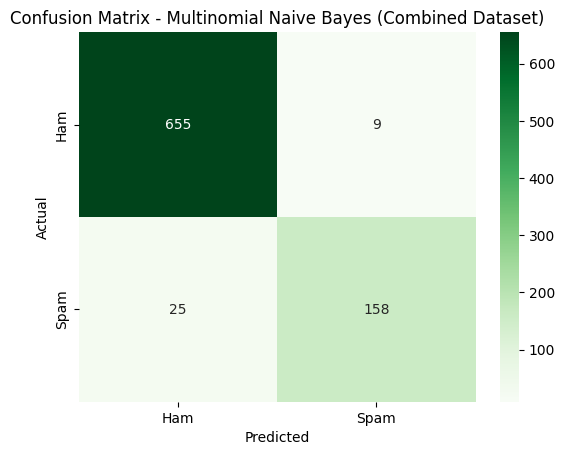

In [23]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

# Initialize the model
nb_clf = MultinomialNB(alpha=0.5)  # you can try 0.1, 0.5, 1.0 later

# Train on the same TF-IDF features
nb_clf.fit(X_train_tfidf, y_train)

# Predict on validation set
y_pred_nb = nb_clf.predict(X_val_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_val, y_pred_nb))
print("\nNaive Bayes Classification Report:\n",
      classification_report(y_val, y_pred_nb, target_names=['Ham', 'Spam']))

# Confusion matrix
cm_nb = confusion_matrix(y_val, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multinomial Naive Bayes (Combined Dataset)")
plt.show()


## SVM Model

Afteer trying with Logistic Regression and Naive Bayes lets do SVM model to test, let's see what the best hyperparameters to use

In [24]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Cs = [0.1, 0.3, 0.5, 1.0, 2.0, 5.0]

svm_results = []

for c in Cs:
    svm = LinearSVC(
        C=c,
        class_weight='balanced',
        random_state=42
    )
    svm.fit(X_train_tfidf, y_train)
    y_pred_svm = svm.predict(X_val_tfidf)

    acc  = accuracy_score(y_val, y_pred_svm)
    prec = precision_score(y_val, y_pred_svm, pos_label=1)  # spam
    rec  = recall_score(y_val, y_pred_svm, pos_label=1)
    f1   = f1_score(y_val, y_pred_svm, pos_label=1)

    svm_results.append((c, acc, prec, rec, f1))

print(" C   | accuracy | prec(spam) | rec(spam) | f1(spam)")
for c, acc, prec, rec, f1 in svm_results:
    print(f"{c:3} | {acc:.4f}  |  {prec:.4f}    |  {rec:.4f}   |  {f1:.4f}")


 C   | accuracy | prec(spam) | rec(spam) | f1(spam)
0.1 | 0.9610  |  0.8989    |  0.9235   |  0.9111
0.3 | 0.9622  |  0.9037    |  0.9235   |  0.9135
0.5 | 0.9634  |  0.9043    |  0.9290   |  0.9164
1.0 | 0.9610  |  0.9032    |  0.9180   |  0.9106
2.0 | 0.9622  |  0.9081    |  0.9180   |  0.9130
5.0 | 0.9575  |  0.9016    |  0.9016   |  0.9016


We get to the conclusion that 0.5 will be our best result to use

Linear SVM (C=0.5) Accuracy: 0.9634002361275088

Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      0.97      0.98       664
        Spam       0.90      0.93      0.92       183

    accuracy                           0.96       847
   macro avg       0.94      0.95      0.95       847
weighted avg       0.96      0.96      0.96       847



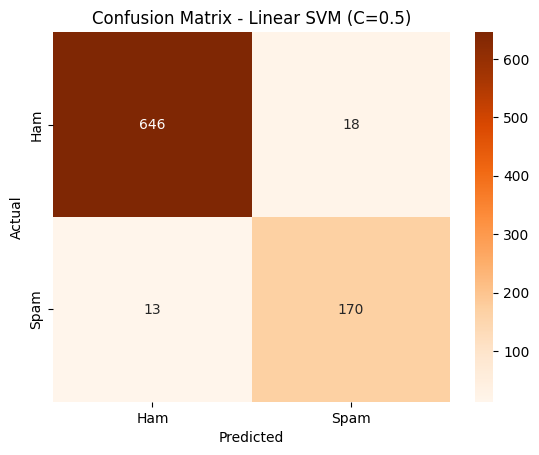

In [25]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_C = 0.5   # <- from tuning results

svm_best = LinearSVC(
    C=best_C,
    class_weight='balanced',
    random_state=42
)

svm_best.fit(X_train_tfidf, y_train)

y_pred_svm_best = svm_best.predict(X_val_tfidf)

print(f"Linear SVM (C={best_C}) Accuracy:", accuracy_score(y_val, y_pred_svm_best))
print("\nClassification Report:\n",
      classification_report(y_val, y_pred_svm_best, target_names=['Ham', 'Spam']))

cm_svm = confusion_matrix(y_val, y_pred_svm_best)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Linear SVM (C={best_C})")
plt.show()


## Final Comparisson between models

After getting results from the three models we can conclude that Linear SVM gives us the best results, followed by Logistic Regression and by Naive Bayes.

In [26]:
import pandas as pd

comparison_df = pd.DataFrame([
    ["Logistic Regression (C=2.0)", 0.9610, 0.8989, 0.9235, 0.9111],
    ["Naive Bayes (alpha=0.5)",     0.9599, 0.9461, 0.8634, 0.9029],
    ["Linear SVM (C=0.5)",          0.9634, 0.9043, 0.9290, 0.9164]
],
columns=["Model", "Accuracy", "Precision (Spam)", "Recall (Spam)", "F1 (Spam)"]
)

comparison_df


,Model,Accuracy,Precision (Spam),Recall (Spam),F1 (Spam)
0,Logistic Regression (C=2.0),0.9610,0.8989,0.9235,0.9111
1,Naive Bayes (alpha=0.5),0.9599,0.9461,0.8634,0.9029
2,Linear SVM (C=0.5),0.9634,0.9043,0.9290,0.9164


#Results

Finally, we are writing these spam vs ham results into its own document for submission

In [27]:
# Generate final predictions using the best model (Linear SVM with C=0.5)
final_predictions = svm_best.predict(X_test_tfidf)

# Create a DataFrame with the predictions
results_df = pd.DataFrame({
    'predicted_label': final_predictions
})

# Display first few predictions
print("First 10 predictions:")
print(results_df.head(10))

# Display prediction distribution
print("\nPrediction Distribution:")
print(results_df['predicted_label'].value_counts())
print(f"\nTotal predictions: {len(results_df)}")
print(f"Ham (0): {(results_df['predicted_label'] == 0).sum()}")
print(f"Spam (1): {(results_df['predicted_label'] == 1).sum()}")

# Save to CSV file
results_df.to_csv('spam_predictions.csv', index=False, header=True)
print("\nResults saved to 'spam_predictions.csv'")

# Also create a version with index as row number
results_with_index = pd.DataFrame({
    'id': range(len(final_predictions)),
    'predicted_label': final_predictions
})
results_with_index.to_csv('spam_predictions_with_id.csv', index=False)
print("Results with ID saved to 'spam_predictions_with_id.csv'")

First 10 predictions:
   predicted_label
0                1
1                0
2                0
3                0
4                0
5                1
6                0
7                1
8                0
9                0

Prediction Distribution:
predicted_label
0    5096
1    1351
Name: count, dtype: int64

Total predictions: 6447
Ham (0): 5096
Spam (1): 1351

Results saved to 'spam_predictions.csv'
Results with ID saved to 'spam_predictions_with_id.csv'
